## 8 Color Mapping Tricks That Make Data Pop
Practical ways to spotlight outliers, emphasize thresholds, and guide the eye — without misleading your audience.

#### 1) Use a perceptually uniform sequential palette for ordered values

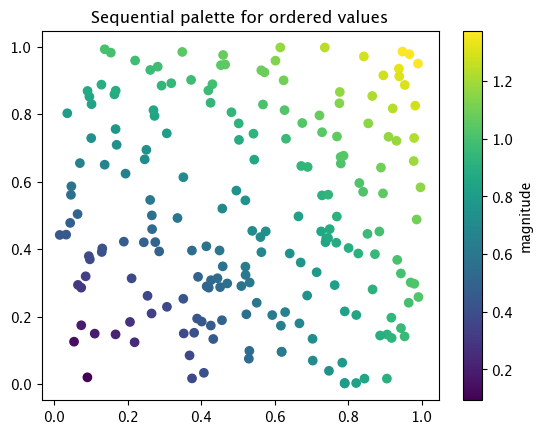

In [1]:
import numpy as np, matplotlib.pyplot as plt

x = np.random.rand(200)
y = np.random.rand(200)
v = np.sqrt(x**2 + y**2)  # ordered metric

plt.scatter(x, y, c=v, cmap="viridis")  # perceptually uniform
plt.colorbar(label="magnitude")
plt.title("Sequential palette for ordered values")
plt.show()

#### 2) For “above vs. below,” anchor a diverging scale at a meaningful midpoint
When zero, target, or average matters, symmetrical color around that point is clearer than a one-way ramp.

Best for: change vs. baseline, deltas, z-scores, error vs. target.
Trick: explicitly set the midpoint to 0 (or your target).

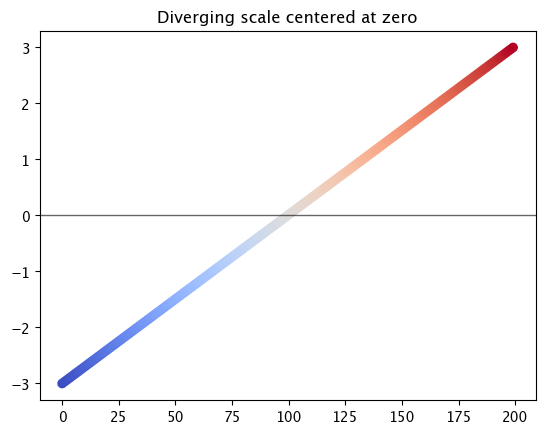

In [2]:
import matplotlib.colors as mcolors

vals = np.linspace(-3, 3, 200)
norm = mcolors.TwoSlopeNorm(vmin=-3, vcenter=0, vmax=3)

plt.scatter(np.arange(vals.size), vals, c=vals, cmap="coolwarm", norm=norm)
plt.axhline(0, color="k", linewidth=1, alpha=.6)
plt.title("Diverging scale centered at zero")
plt.show()

#### 3) Accent + mute: highlight a few points without rewriting the scale
Most charts have two groups: the few you care about and the many you don’t. Start there.

Method: color all non-key marks in quiet greys; assign a single vivid accent to the key group.
Benefit: keeps the quantitative scale intact, but your story pops.

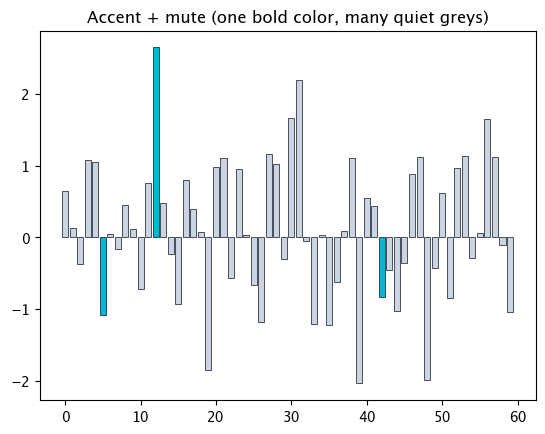

In [3]:
key_ids = {5, 12, 42}
ids = np.arange(60)
vals = np.random.randn(60)

colors = np.where(np.isin(ids, list(key_ids)), "#06B6D4", "#CBD5E1")  # teal vs grey
plt.bar(ids, vals, color=colors, edgecolor="#0B1220", linewidth=.5)
plt.title("Accent + mute (one bold color, many quiet greys)")
plt.show()

#### 4) Quantile/threshold binning with stepped palettes to avoid false precision
When the exact value matters less than the bucket, step your colors. The legend becomes a decision tool, not a gradient guessing game.

Best for: SLAs, risk bands, quartiles, marketing segments.
Bonus: thresholds translate cleanly into text labels.

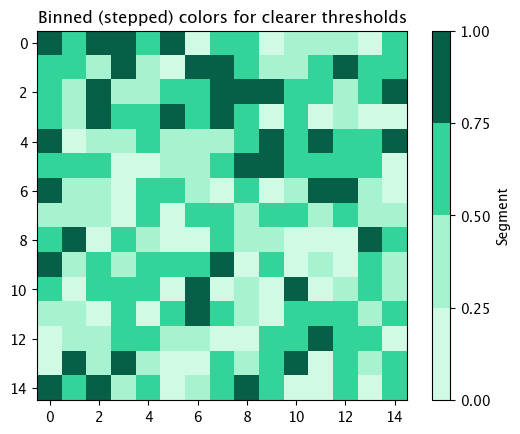

In [4]:
from matplotlib.colors import ListedColormap, BoundaryNorm

data = np.random.rand(15, 15)
bounds = [0, .25, .5, .75, 1.0]  # quartiles or business thresholds
cmap = ListedColormap(["#D1FAE5", "#A7F3D0", "#34D399", "#065F46"])
norm = BoundaryNorm(bounds, cmap.N)

plt.imshow(data, cmap=cmap, norm=norm)
plt.colorbar(ticks=bounds, label="Segment")
plt.title("Binned (stepped) colors for clearer thresholds")
plt.show()

#### 5) Semantic colors with redundant encoding (because not everyone sees red/green)
Color carries cultural meaning — use it, but back it up.

Map “good/ok/bad” to a robust set (e.g., green/amber/rose), and add a second cue: shape, pattern, or icon.
Works for dashboards where a quick scan beats a legend lookup.

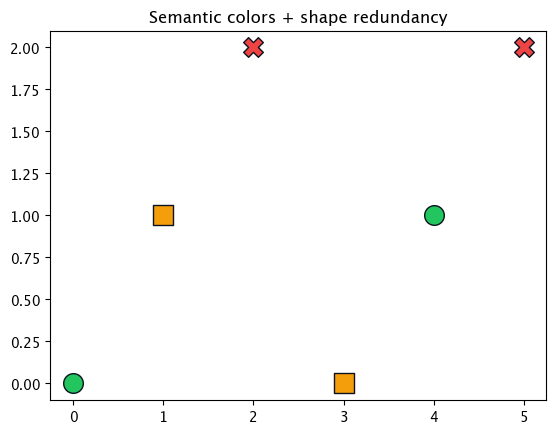

In [5]:
labels = np.array(["Good","OK","Bad","OK","Good","Bad"])
color_map = {"Good":"#22C55E", "OK":"#F59E0B", "Bad":"#EF4444"}
marker_map = {"Good":"o", "OK":"s", "Bad":"X"}

for i, lab in enumerate(labels):
    plt.scatter(i, i%3, color=color_map[lab], marker=marker_map[lab], s=200, edgecolor="#0B1220")
plt.title("Semantic colors + shape redundancy")
plt.show()

#### 6) Outlier glow/outline: keep the scale honest, make the standout unmistakable
When one point matters, don’t nuke the colormap. Give it structure.

Add a thicker dark edge (or subtle halo) to the point(s) of interest.
Everything else uses the same color scale.


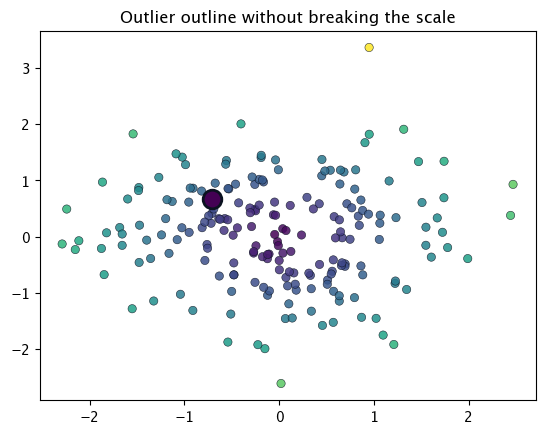

In [6]:
x = np.random.randn(200)
y = np.random.randn(200)
c = np.hypot(x, y)

plt.scatter(x, y, c=c, cmap="viridis", alpha=.85, edgecolor="#0B1220", linewidth=.4)
# Outlier at index 7
plt.scatter([x[7]], [y[7]], c=[c[7]], cmap="viridis",
            edgecolor="#0B1220", linewidth=2.0, s=180, zorder=3)
plt.title("Outlier outline without breaking the scale")
plt.show()

#### 7) Normalize by domain, not by panel — so comparisons stay honest
Facet charts love to cheat: each panel auto-scales, and suddenly the small market looks as strong as the big one. Fix it.

Use a shared normalization across facets (same vmin/vmax), or symmetrical bounds for percent change.
Add a panel subtitle or caption that states the shared range.

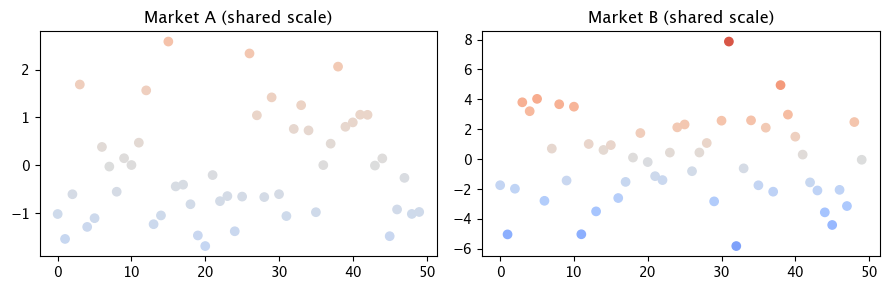

In [7]:
import matplotlib.colors as mcolors

vals_a = np.random.randn(50) * 1.0   # small variance
vals_b = np.random.randn(50) * 3.0   # large variance
norm = mcolors.Normalize(vmin=-10, vmax=10)   # shared across subplots

fig, ax = plt.subplots(1, 2, figsize=(9,3))
ax[0].scatter(range(50), vals_a, c=vals_a, cmap="coolwarm", norm=norm)
ax[1].scatter(range(50), vals_b, c=vals_b, cmap="coolwarm", norm=norm)
for a, t in zip(ax, ["Market A", "Market B"]):
    a.set_title(t + " (shared scale)")
plt.tight_layout(); plt.show()

#### 8) Do a contrast & grayscale sanity check before you ship
If your annotations disappear on a projector or in a PDF, the chart fails — no matter how clever the palette.

Check WCAG contrast for text-on-color.
Preview a grayscale version to ensure legibility without hue.

In [8]:
import numpy as np

def relative_luminance(rgb):  # rgb in 0–1
    def f(c): return (c/12.92) if c <= 0.03928 else ((c+0.055)/1.055)**2.4
    r, g, b = map(f, rgb)
    return 0.2126*r + 0.7152*g + 0.0722*b

def contrast_ratio(rgb1, rgb2):
    L1, L2 = sorted([relative_luminance(rgb1), relative_luminance(rgb2)], reverse=True)
    return (L1 + 0.05) / (L2 + 0.05)

# Example: dark text on teal background
text = (0.06, 0.07, 0.13)   # near #0B1220
bg   = (0.02, 0.71, 0.83)   # near #06B6D4
print("Contrast ratio:", round(contrast_ratio(text, bg), 2))

Contrast ratio: 7.59
